# Classification

Setting up environment for modeling. Explore the data to understand feature correlations, determine which features to include and running different models to find the best fit. 

Models Attempted:

- [**Logistic Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- [**Decision Trees**](https://scikit-learn.org/stable/modules/tree.html)

- [**Gradient Boosting**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

- [**Random Forest**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- [**Extra Trees**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

# **Load Adjusted Dataset**

The original dataset on Kaggle removed a large amount of weather data during the final data cleaning steps. In order to improve our weather based predictions we re-ran the data collection process and re-included removed data points.

### Preview of available data

Combining the test and train files here because they are split later in the code for this method. They were pre-split in the Kaggle file the data was taken from.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import the modules
import os
import pandas as pd
    
#read the path
file_path = 'data/csv_files'
#list all the files from the directory
csv_files = os.listdir(file_path)

#append all files together
flight_data = pd.DataFrame()

for file in csv_files:
            df_temp = pd.read_csv('data/csv_files/'+file)
            flight_data = flight_data.append(df_temp, ignore_index=True)
flight_data

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.192550,0.123487,0.196519,0.138067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,6,4,0,1500-1559,2,5,4,70,Comair Inc.,1190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.217198,0.222554,0.251477,0.292230
6489058,4,4,1,2100-2159,2,9,12,143,Southwest Airlines Co.,5669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.215726,0.192585,0.171317,0.263840
6489059,4,7,1,1900-1959,6,5,21,175,Southwest Airlines Co.,14827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.215726,0.112840,0.203724,0.266095
6489060,12,7,0,2000-2059,3,6,69,110,Delta Air Lines Inc.,13603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.157390,0.186040,0.226980,0.286800


In [4]:
pd.set_option('display.max_columns', None)
flight_data.head() #display sample dataframe

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,81803,180,819756,12460183,0.000144,0.000149,18,Chicago Midway International,41.785,-87.752,Atlanta Municipal,0.0,0.0,0.0,64.0,13.87,49.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,22191,1956,1208249,1212846,0.000000,0.000094,15,LaGuardia,40.779,-73.876,Bangor International,0.0,0.0,0.0,48.0,12.08,42.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,43512,4679,2743323,8501631,0.000254,0.000229,7,Stapleton International,39.774,-104.880,Los Angeles International,0.0,0.0,0.0,54.0,10.07,38.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,21136,1629,2780593,2884187,0.000032,0.000175,3,Los Angeles International,33.942,-118.408,Portland International,0.0,0.0,0.0,64.0,7.38,58.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,114987,6116,1903352,13382999,0.000062,0.000099,20,McCarran International,36.080,-115.152,Spokane International,0.0,0.0,0.0,104.0,4.92,92.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192550,0.123487,0.196519,0.138067


In [5]:
print("Available data points within dataset:")
for col in flight_data.columns: 
    print(col)

Available data points within dataset:
MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
TAVG
TMIN
WT01
WT02
WT03
WT05
WT07
WT08
WT09
WT10
WT11
CARRIER_HISTORICAL
DEP_AIRPORT_HIST
DAY_HISTORICAL
DEP_BLOCK_HIST


## Restrict to Douglas Municipal

We selected Douglas Municipal as an airport to compare to LaGuardia because it has a high number of delays and is in Douglas, Arizona. Arizona experiences less of the types of weather that might delay flights like snow, thunder and heavy rain.

We want to see how weather performs as a predictor of delays for different regions.

In [11]:
#set as copy of flight data to prevent SettingwithCopyWarning
az = flight_data.loc[flight_data['DEPARTING_AIRPORT'] == "Douglas Municipal"].copy()
az.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
55,5,1,0,0600-0659,2,1,11,66,Mesa Airlines Inc.,19807,18618,199,2006675,1191889,0.000000,0.000091,16,Douglas Municipal,35.219,-80.936,NONE,0.0,0.0,0.0,78.0,8.05,71.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196234,0.187883,0.193668,0.069222
56,4,2,0,0700-0759,9,1,50,187,American Airlines Inc.,18979,74131,7939,2006675,11744595,0.000098,0.000177,4,Douglas Municipal,35.219,-80.936,NONE,0.0,0.0,0.0,73.0,5.82,57.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204604,0.187883,0.138603,0.094280
61,5,7,0,1900-1959,2,8,22,70,Comair Inc.,19807,24260,8154,2006675,1245396,0.000000,0.000090,16,Douglas Municipal,35.219,-80.936,Fayetteville Regional/Grannis Field,0.0,0.0,0.0,95.0,4.03,83.0,68.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.171848,0.187883,0.211331,0.307369
103,10,4,1,1500-1559,3,5,19,100,JetBlue Airways,20449,24795,145,2006675,3190369,0.000160,0.000127,12,Douglas Municipal,35.219,-80.936,Logan International,0.0,0.0,0.0,67.0,5.59,55.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198369,0.186675,0.192619,0.196905
135,7,1,1,1600-1659,3,4,61,90,Comair Inc.,19534,24403,8305,2006675,1245396,0.000000,0.000090,5,Douglas Municipal,35.219,-80.936,Theodore Francis Green State,0.0,0.0,0.0,92.0,3.80,80.0,66.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.214296,0.193519,0.219939,0.289210


## Set up Environment

In [7]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr

## Determine how many observations fall under each class 
### 0 : not delayed 1 : delayed

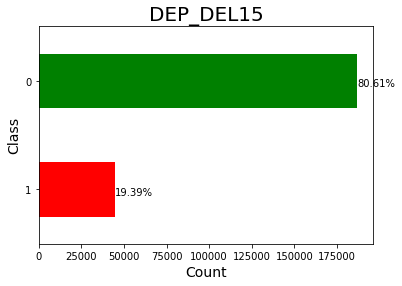

0    186897
1     44958
Name: DEP_DEL15, dtype: int64


In [12]:
# Plotting the percentage of observations that fall under each class
ax = az["DEP_DEL15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("DEP_DEL15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(az["DEP_DEL15"].value_counts())
fig = ax.get_figure()

## Point Biserial Correlation for Quantitative, Continuous Features with DEP_DEL15

A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.

A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable.  [Interpreting PBC](https://www.scalestatistics.com/point-biserial.html)

We see that the highest correlation for DEP_DEL15 is with WTO3 (Thunder), PRCP (precipitation) and TMIN (temperature min). Compared to LaGuardia, we are seeing lower correlations between weather data and departure delay.

In [15]:
#Encode to numerical values 
labelEncoder = LabelEncoder()
az["CARRIER_NAME"] = labelEncoder.fit_transform(az["CARRIER_NAME"])
az["PREVIOUS_AIRPORT"] = labelEncoder.fit_transform(az["PREVIOUS_AIRPORT"])
az["DEPARTING_AIRPORT"] = labelEncoder.fit_transform(az["DEPARTING_AIRPORT"])
az["DEP_TIME_BLK"] = labelEncoder.fit_transform(az["PREVIOUS_AIRPORT"])

# get continuous and dichotomous data
categorical = ["DEP_DEL15","MONTH","DAY_OF_WEEK","DEP_TIME_BLK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS","CARRIER_NAME","AIRPORT_FLIGHTS_MONTH","AIRLINE_FLIGHTS_MONTH","AIRLINE_AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT","AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS",
"GROUND_SERV_PER_PASS","PLANE_AGE","DEPARTING_AIRPORT","LATITUDE","LONGITUDE","PREVIOUS_AIRPORT","CARRIER_HISTORICAL","DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST"]
#Remove WT09, WT07, SNWD because values are constant
numeric = ["PRCP", "SNOW", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT08"]
target = az["DEP_DEL15"]

# pbc of first question
pbc = list()
for col in numeric:
    ans = pointbiserialr(az[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,WT03,0.160840,0.000000e+00
1,PRCP,0.115728,0.000000e+00
2,TMIN,0.071302,5.681815e-259
3,WT01,0.064877,1.122171e-214
4,AWND,0.056345,2.387635e-162
5,WT05,0.051239,1.432161e-134
6,TAVG,0.049938,6.463418e-128
7,WT08,0.039350,4.046266e-80
8,TMAX,0.035506,1.432399e-65
9,WT02,0.030582,4.185222e-49


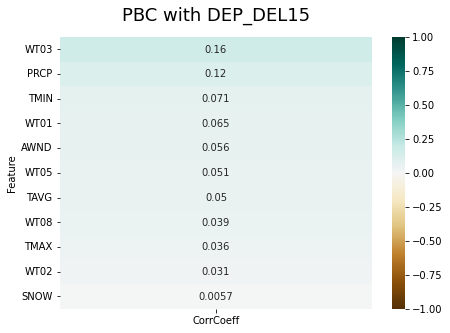

In [16]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with DEP_DEL15", fontdict={"fontsize":18}, pad=16);


## Spearman Coefficient with categorical data

Weather is not the only factor that causes delays. We can see here that there is a strong correlation between Carrier Historical delays and Departing Airport Historical delays and the likelihood of a departure delay.

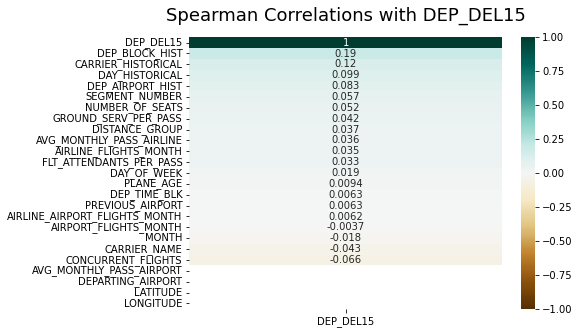

In [18]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(az[categorical].corr(method="spearman")[["DEP_DEL15"]].sort_values(by="DEP_DEL15", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Spearman Correlations with DEP_DEL15", fontdict={"fontsize":18}, pad=16)
plt.savefig("data/Img/05_03_Spearman_Dep_Del15.png")
del heatmap

## Feature Selection

1. Clean up non-numerical values and remove any problematic NA values.
2. Obtain and visualize feature importance ranking
3. Select features based on importance ranking

In [20]:
#Convert all data to numeric
az = az.apply(pd.to_numeric)

# check for nulls
nan_in_df = az.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))
 
az.dropna(subset=['DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST'], inplace=True)

nan_in_df = az.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))

print("printing column name where infinity is present")
col_name = az.columns.to_series()[np.isinf(az).any()]
print(col_name)

Number of NaN values present: 0
Number of NaN values present: 0
printing column name where infinity is present
Series([], dtype: object)


### What happens if we look at weather data alone as features?

Is historical weather data enough to adequately predict flight delays?

Drop W10 and W11. Values not unique

In [28]:
#Select all data as features
X = az[["PRCP","SNOW", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT08"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(az["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

Number of NaN values present: 0
Series([], dtype: bool)


array([0.19813706, 0.00052249, 0.11334531, 0.12786676, 0.12522881,
       0.13447371, 0.02785777, 0.00943054, 0.24006068, 0.00490494,
       0.01817194])

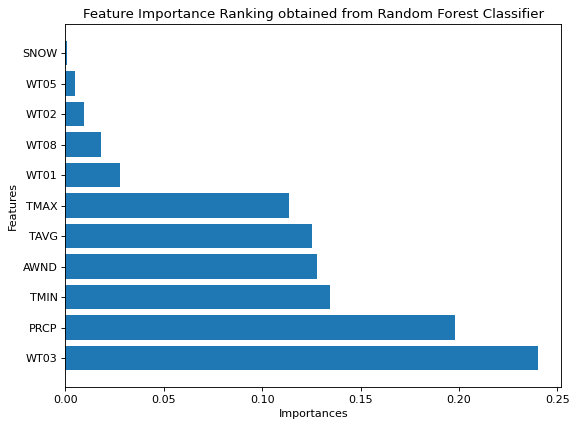

In [29]:
importances = pd.DataFrame({
    "Feature": list(XNormed.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("data/Img/05_04_Feature_Importances_RFC.png")

Snow is not important in Arizona! Let's remove snow based on these results.

In [30]:
del X
del y
del model
del importances

In [32]:
#Select relevant data as features
X = az[["PRCP","TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT08"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(az["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([0.21457793, 0.1108294 , 0.12622955, 0.11592602, 0.13000919,
       0.02320269, 0.00835384, 0.24694263, 0.00666103, 0.01726771])

In [35]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {XNormed.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(XNormed, y, test_size=0.80, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (231855, 10)
features_train shape: (46371, 10) | features_test shape: (185484, 10)
labels_train shape: (46371,) | labels_test shape: (185484,)


### Logistic Regression Model with Weather Features

[[149537      0]
 [ 35947      0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89    149537
           1       0.00      0.00      0.00     35947

    accuracy                           0.81    185484
   macro avg       0.40      0.50      0.45    185484
weighted avg       0.65      0.81      0.72    185484



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


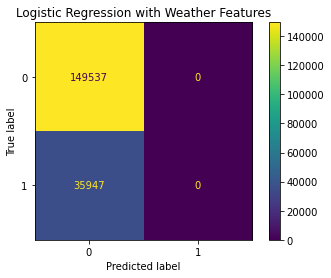

In [36]:
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/LogisticRegression.joblib")
#model = joblib.load("data/Classifiers/LogisticRegression.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_LogRegression_Weather")

### Decision Tree Classifier with Weather Features

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    149537
           1       0.53      0.03      0.06     35947

    accuracy                           0.81    185484
   macro avg       0.67      0.51      0.48    185484
weighted avg       0.76      0.81      0.73    185484



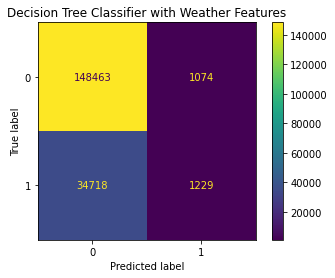

In [37]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/DecisionTreeClassifier.joblib")
#model = joblib.load("data/Classifiers/DecisionTreeClassifier.joblib")

model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_DTC_Confusion_Matrix_Weather")


## Gradient Boosting with Weather Features

              precision    recall  f1-score   support

           0       0.81      1.00      0.89    149537
           1       0.59      0.02      0.04     35947

    accuracy                           0.81    185484
   macro avg       0.70      0.51      0.47    185484
weighted avg       0.77      0.81      0.73    185484



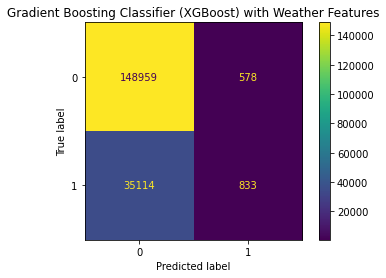

In [39]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/GradientBoostingClassifier.joblib")
#model = joblib.load("data/Classifiers/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost) with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_GradientBoost_Weather")

## Random Forest with Weather Features

Increased default size of trees to improve accuracy.

[[148463   1074]
 [ 34718   1229]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    149537
           1       0.53      0.03      0.06     35947

    accuracy                           0.81    185484
   macro avg       0.67      0.51      0.48    185484
weighted avg       0.76      0.81      0.73    185484



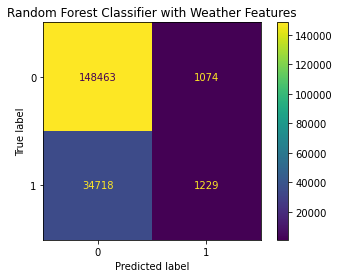

In [40]:
model = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/RandomForestClassifier.joblib")
#model = joblib.load("data/Classifiers/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_08_RFC_Confusion_Matrix_Weather")
del model
del model_pred

## Extra Trees

Increased default size of trees to improve accuracy.

[[148463   1074]
 [ 34718   1229]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    149537
           1       0.53      0.03      0.06     35947

    accuracy                           0.81    185484
   macro avg       0.67      0.51      0.48    185484
weighted avg       0.76      0.81      0.73    185484



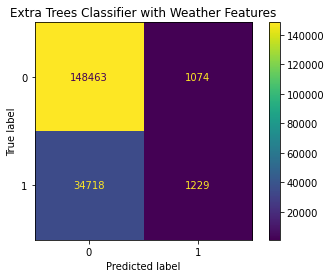

In [41]:
model = ExtraTreesClassifier(n_jobs=-1,n_estimators = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/ExtraTreesClassifier.joblib")
# model = joblib.load("./Classifiers/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_09_ETC_Confusion_Matrix_Weather")

## Result

Running our models based only on the weather variables did not produce very good prediction results. 

In [42]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"data/Classifiers/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

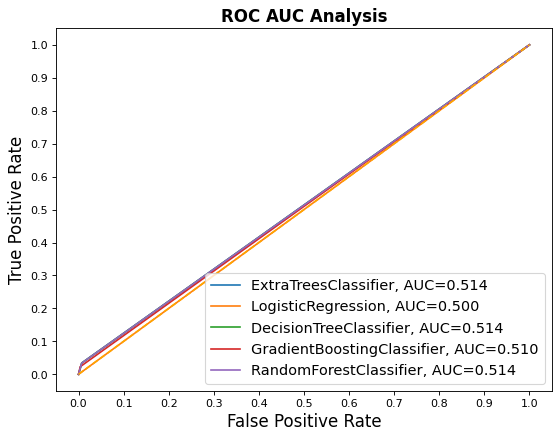

In [43]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("data/Img/05_10_Classifiers_ROC_AUC.png")

## Is weather data alone providing an accurate prediction?

No, weather data alone is not providing an accurate prediction. Weather data is a very poor predictor of delays in Arizona. We had to remove many features for having no unique data (presumably because they are not factors in Arizona weather). It looks like this variation in weather's importance may be a reason we had trouble predicting delays across all airports with weather.

## Classification with All Available Data

In [45]:
del X
del y
del model
del importances

NameError: name 'X' is not defined

In [47]:
#Select all data as features

X = az[["MONTH","DAY_OF_WEEK","DEP_TIME_BLK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS","CARRIER_NAME","AIRLINE_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS",
"GROUND_SERV_PER_PASS","PLANE_AGE","PREVIOUS_AIRPORT","CARRIER_HISTORICAL","DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST","PRCP","TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT08"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(az["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([0.01165086, 0.02381662, 0.08673426, 0.05511957, 0.05325923,
       0.07849151, 0.03945264, 0.00703724, 0.01755094, 0.00674309,
       0.00589953, 0.00677745, 0.08177942, 0.08686855, 0.02313996,
       0.08814179, 0.0328183 , 0.09514177, 0.022928  , 0.03564781,
       0.03977183, 0.034029  , 0.03671186, 0.00717791, 0.00178331,
       0.01349751, 0.00065654, 0.0073735 ])

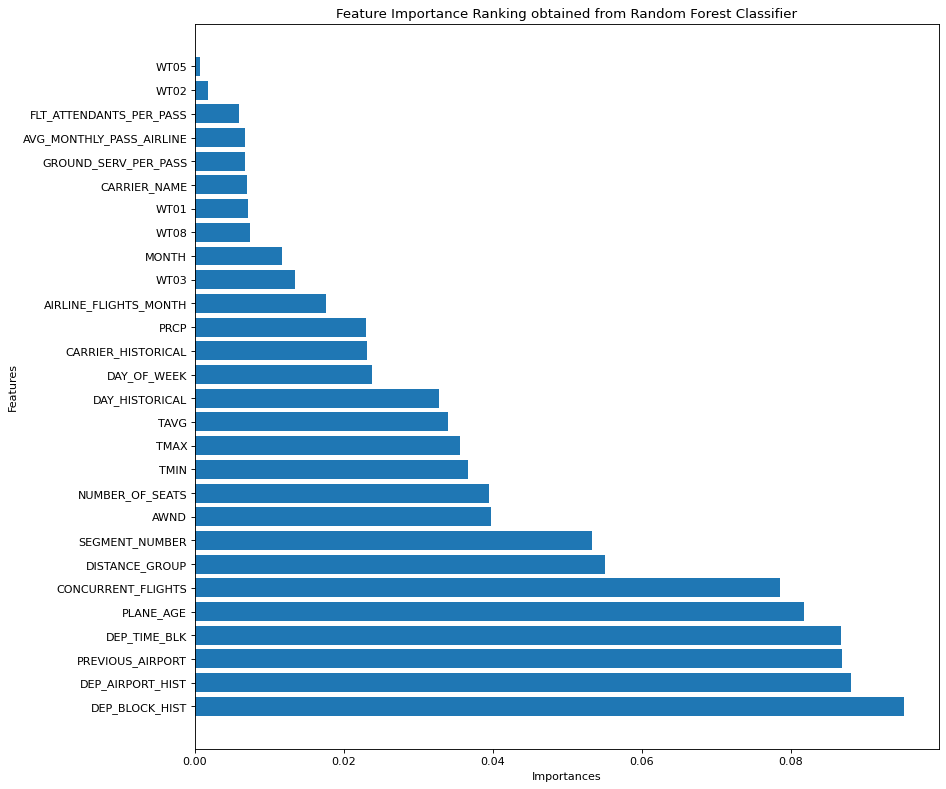

In [48]:
importances = pd.DataFrame({
    "Feature": list(XNormed.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(12, 12), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("data/Img/05_04_Feature_Importances_RFC.png")

Only one of the top 10 most important features is a weather data pont (AWND - max wind speed). The most important features for Arizona are non-weather features.

In [49]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {XNormed.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(XNormed, y, test_size=0.80, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (231855, 28)
features_train shape: (46371, 28) | features_test shape: (185484, 28)
labels_train shape: (46371,) | labels_test shape: (185484,)


## Logistic Regression with All Features

[[147843   1694]
 [ 33347   2600]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.89    149537
           1       0.61      0.07      0.13     35947

    accuracy                           0.81    185484
   macro avg       0.71      0.53      0.51    185484
weighted avg       0.78      0.81      0.75    185484



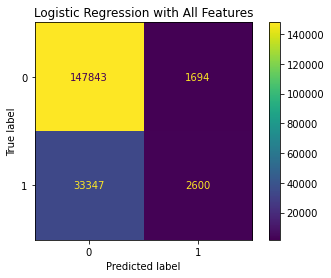

In [50]:
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/LogisticRegression.joblib")
#model = joblib.load("data/Classifiers/LogisticRegression.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_LogRegression")

## Decision Tree with All Features

              precision    recall  f1-score   support

           0       0.84      0.82      0.83    149537
           1       0.31      0.34      0.32     35947

    accuracy                           0.72    185484
   macro avg       0.57      0.58      0.57    185484
weighted avg       0.73      0.72      0.73    185484



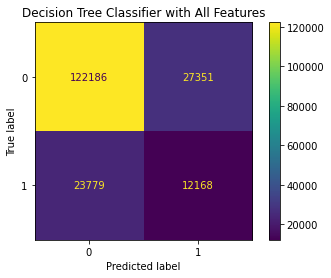

In [51]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/DecisionTreeClassifier.joblib")
#model = joblib.load("data/Classifiers/DecisionTreeClassifier.joblib")

model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_DTC_Confusion_Matrix")


## Gradient Boosting with All Features

              precision    recall  f1-score   support

           0       0.83      0.98      0.90    149537
           1       0.66      0.14      0.23     35947

    accuracy                           0.82    185484
   macro avg       0.75      0.56      0.56    185484
weighted avg       0.79      0.82      0.77    185484



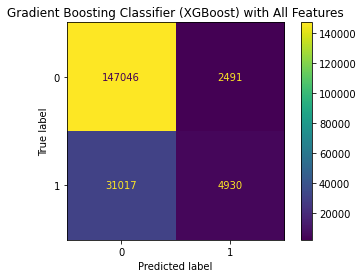

In [52]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/GradientBoostingClassifier.joblib")
#model = joblib.load("data/Classifiers/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost) with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_GradientBoost")

## Random Forest with All Features

[[145058   4479]
 [ 29043   6904]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90    149537
           1       0.61      0.19      0.29     35947

    accuracy                           0.82    185484
   macro avg       0.72      0.58      0.59    185484
weighted avg       0.79      0.82      0.78    185484



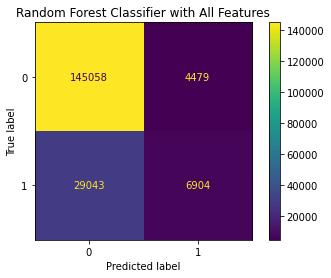

In [53]:
model = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/RandomForestClassifier.joblib")
#model = joblib.load("data/Classifiers/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_08_RFC_Confusion_Matrix")
del model
del model_pred

## Extra Trees with All Features

[[142875   6662]
 [ 28468   7479]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89    149537
           1       0.53      0.21      0.30     35947

    accuracy                           0.81    185484
   macro avg       0.68      0.58      0.59    185484
weighted avg       0.77      0.81      0.78    185484



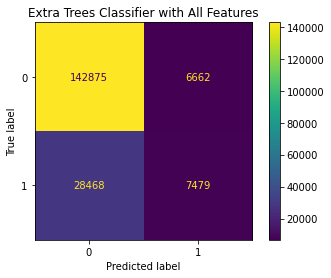

In [54]:
model = ExtraTreesClassifier(n_jobs=-1,n_estimators = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/ExtraTreesClassifier.joblib")
# model = joblib.load("./Classifiers/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_09_ETC_Confusion_Matrix")

In [55]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"data/Classifiers/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

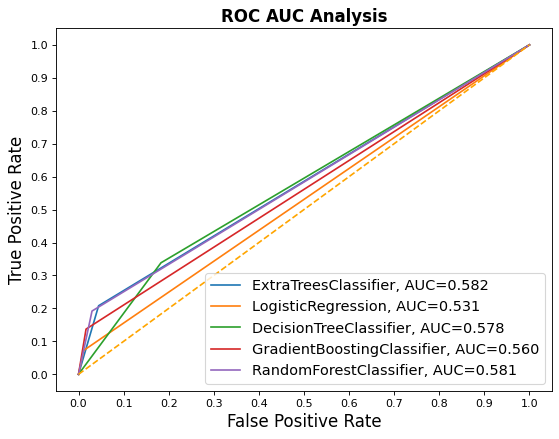

In [56]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("data/Img/05_10_Classifiers_ROC_AUC.png")

## Conclusion

We saw very different results when comparing all airports, LaGuardia only and Douglas Municipal only! Over all US airports weather does not provide a strong prediction of flight delays. However, when we drill down to specific airports we see that this is because of the variation in importance by airport. Weather is predictive at LaGuardia in New York, but barely predictive at Douglas Municipal in Arizona. 

Our orginal hypothesis in Phase 1, was that we may see that weather had varying levels of importance in different locations. We learned that that was in fact correct. The variance in weather's importance makes large scale predictions of delays across all of the US challenging. When comparing to other projects online this made sense. Those able to make strong predictions either focused on one city or incorporated very strong indicators of delay (incoming flight delay). 

We expected that weather prediction would be an important factor in this project, but when performing the classification we found that weather prediction was not in fact the most important factor. Thus, we focused our analysis on attempting different models and incorporating additional features rather than on predicting weather as we expected. In contrast with what we expected, the more important usage of our data would be to look into the non-weather causes of delays because, unlike the weather, they lay in the hands of aviation industry leaders. For example, we see that Plane Age is a consistently important feature in departure delays - both when looking at individual airports and when looking at all US airports. That indicates a new hypothesis. Are older planes associated with large numbers of delays because of mechanical issues? Maybe, instead of checking the weather before a flight to determine a delay we should be considering the age of the plane! If that is the case, airline leaders may be able to improve delays by focusing on the mechanical issues associated with older planes.

There are also limitations in our approach. Looking at a single airport to improve accuracy is less efficient than looking at all airports together. We also are limited in the data we used. There are more potential data points (such as previous flight delay, additional weather data not available in our dataset) that can be incorporated to improve accuracy. 